In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# data = np.array(df.iloc[:100, [0, 1, -1]])

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


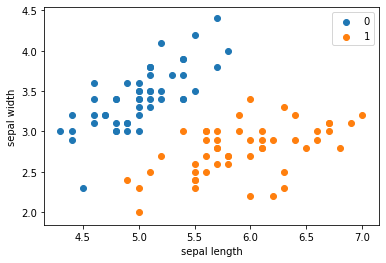

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [28]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        self.n=n_neighbors
        self.p=p
        self.X_train=X_train
        self.y_train=y_train

    def predict(self, X):
        '''
        predict point X with the existing train dataset
        
        '''
        knn_list=[]
        for i in range(self.n):
            dist=np.linalg.norm(X-self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index=knn_list.index(max(knn_list, key=lambda x:x[0]))
            dist=np.linalg.norm(X-self.X_train[i], ord=self.p)
            if knn_list[max_index][0]>dist:
                knn_list[max_index]=(dist, self.y_train[i])

        knn=[k[-1] for k in knn_list]
        count_pairs= Counter(knn)
        max_count=sorted(count_pairs.items(), key=lambda x: x[-1])[-1][0]
        return max_count



    def score(self, X_test, y_test):
        right_count = 0
        
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [15]:
knn_list=[]
knn_list.append((3.4, 1))
knn_list.append((5.4, 2))
knn_list.append((5.7, 2))
knn=[k[-1] for k in knn_list]

In [16]:
count_pairs=Counter(knn)

In [19]:
sorted(count_pairs.items(), key=lambda x: x[-1])[-1][0]

2

In [24]:
for x, y in zip(X_test, y_test):
    print(x, y)

[5.  3.4] 0.0
[6.7 3. ] 1.0
[5.4 3.9] 0.0
[6.1 2.8] 1.0
[4.6 3.2] 0.0
[4.3 3. ] 0.0
[5.2 3.4] 0.0
[5.2 3.5] 0.0
[4.8 3. ] 0.0
[5.4 3.4] 0.0
[4.9 3.1] 0.0
[5.  3.3] 0.0
[4.6 3.6] 0.0
[6.1 2.8] 1.0
[4.4 3. ] 0.0
[6.5 2.8] 1.0
[6.4 3.2] 1.0
[5.1 3.8] 0.0
[5. 2.] 1.0
[5.1 3.5] 0.0


In [36]:
clf = KNN(X_train, y_train)

In [37]:
clf.score(X_test, y_test)

1.0